# Exploratory Data Analysis

## Data Loading and Exploration

In [1]:
# Import pandas for data manipulation and analysis.
import pandas as pd

# Import matplotlib and seaborn for data visualization. Seaborn is based on matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt
import seaborn as sns

# Import StandardScaler from sklearn.preprocessing to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Import clustering algorithms from sklearn.cluster. KMeans for partitioning n observations into k clusters. AgglomerativeClustering for hierarchical clustering using a bottom up approach.
from sklearn.cluster import AgglomerativeClustering, KMeans

# Import dendrogram and linkage from scipy.cluster.hierarchy for hierarchical clustering. Linkage for performing hierarchical clustering, and dendrogram for plotting the hierarchical clustering as a dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage

Load the customer dataset from a CSV file. Perform an initial exploration of the data to understand the features available, their data types, and the dataset’s structure.

In [2]:
# Load the dataset
data = pd.read_csv('customer_segmentation_data.csv')

# Display the first few rows to understand the features and their data types
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


(None,
    minutes_watched     CLV  region  channel
 0           3197.0  205.42       2        4
 1             63.0  149.99       0        1
 2            605.0  119.00       2        2
 3             20.0  240.00       2        4
 4            245.0  184.36       1        4)

## Data Cleaning and Preprocessing

In [3]:
#Checking null values
data.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [4]:
# Fill missing values in 'minutes_watched' with zeroes as per instruction
data['minutes_watched'].fillna(0, inplace=True)

# Verify the changes by checking for any remaining null values in the dataset
data.isnull().sum()


minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

The missing values in the minutes_watched column have been successfully filled with zeroes. Now, there are no missing or null values remaining in the dataset.

## Feature Engineering

In [5]:
# Create dummy variables for the 'channel' categorical feature
# Note: The 'region' feature is kept as is, based on the instruction
channel_dummies = pd.get_dummies(data['channel'], prefix='channel', drop_first=True)

# Concatenate the original data with the new dummy variables
data_with_dummies = pd.concat([data, channel_dummies], axis=1)

# Drop the original 'channel' column to avoid redundancy
data_with_dummies.drop('channel', axis=1, inplace=True)

# Analyze the correlation between the different variables
correlation_matrix = data_with_dummies.corr()

correlation_matrix


,minutes_watched,CLV,region,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
minutes_watched,1.000000,0.114153,0.040100,0.034347,0.007681,-0.020212,-0.015796,-0.024114,0.004660,0.015535
CLV,0.114153,1.000000,-0.273312,-0.042313,0.095619,-0.070633,-0.044381,-0.012982,-0.025334,0.019438
region,0.040100,-0.273312,1.000000,0.049888,-0.080044,0.070290,0.058583,0.006083,0.083908,-0.103089
channel_2,0.034347,-0.042313,0.049888,1.000000,-0.186093,-0.133066,-0.036500,-0.084089,-0.111147,-0.083931
channel_3,0.007681,0.095619,-0.080044,-0.186093,1.000000,-0.285498,-0.078313,-0.180416,-0.238471,-0.180078
channel_4,-0.020212,-0.070633,0.070290,-0.133066,-0.285498,1.000000,-0.055997,-0.129006,-0.170519,-0.128765
channel_5,-0.015796,-0.044381,0.058583,-0.036500,-0.078313,-0.055997,1.000000,-0.035387,-0.046774,-0.035320
channel_6,-0.024114,-0.012982,0.006083,-0.084089,-0.180416,-0.129006,-0.035387,1.000000,-0.107757,-0.081371
channel_7,0.004660,-0.025334,0.083908,-0.111147,-0.238471,-0.170519,-0.046774,-0.107757,1.000000,-0.107555
channel_8,0.015535,0.019438,-0.103089,-0.083931,-0.180078,-0.128765,-0.035320,-0.081371,-0.107555,1.000000


After creating dummy variables for the channel categorical feature and analyzing the correlation between different variables, here are the key observations:

Correlation with CLV: The minutes_watched feature has a positive correlation with CLV (Customer Lifetime Value), suggesting that as the minutes watched increases, the CLV tends to increase as well, though the correlation is relatively weak (0.114153). The region feature shows a negative correlation with CLV (-0.273312), indicating that different regions might have varying impacts on CLV.

Correlation among Channels: The dummy variables for channel show varying degrees of correlation with minutes_watched and CLV, but these correlations are generally weak. This indicates that while there might be some relationship between the acquisition channel and customer behavior/value, it is not strongly linear.

Inter-Channel Correlation: The dummy variables for the channels do not directly correlate with each other, which is expected since they are mutually exclusive categories (a customer belongs to one channel at a time).

Region and Channel Interaction: The region shows some degree of correlation with the channels (channel_2 to channel_8), suggesting that the distribution of channels might vary by region.

Given these observations, all features could potentially offer unique insights into customer behavior and segmentation. The original channel column has been removed to avoid multicollinearity, and the region column has been kept as instructed.

## Data Visualization and Correlation Analysis

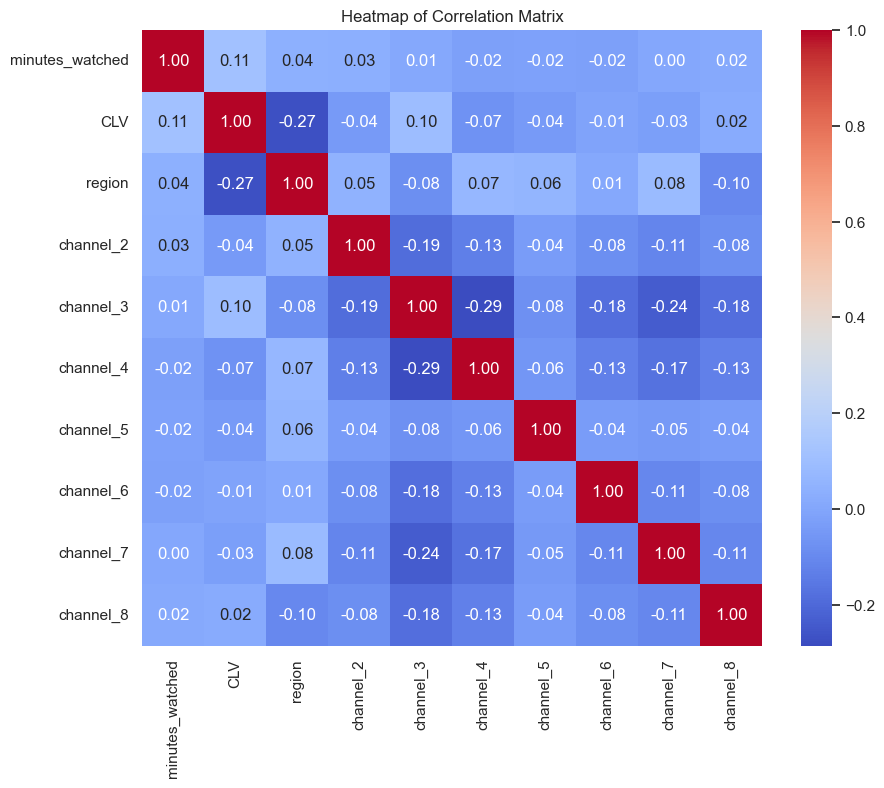

In [6]:
# Set the style of seaborn
sns.set(style="white")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


This visualization shows the correlation coefficients between different variables in the dataset. Lighter colors indicate a positive correlation, while darker colors indicate a negative correlation. The correlation between CLV and minutes_watched is positive but weak, suggesting a slight tendency for higher customer lifetime value with increased minutes watched. The negative correlation between CLV and region suggests that the customer lifetime value might vary significantly across different regions.

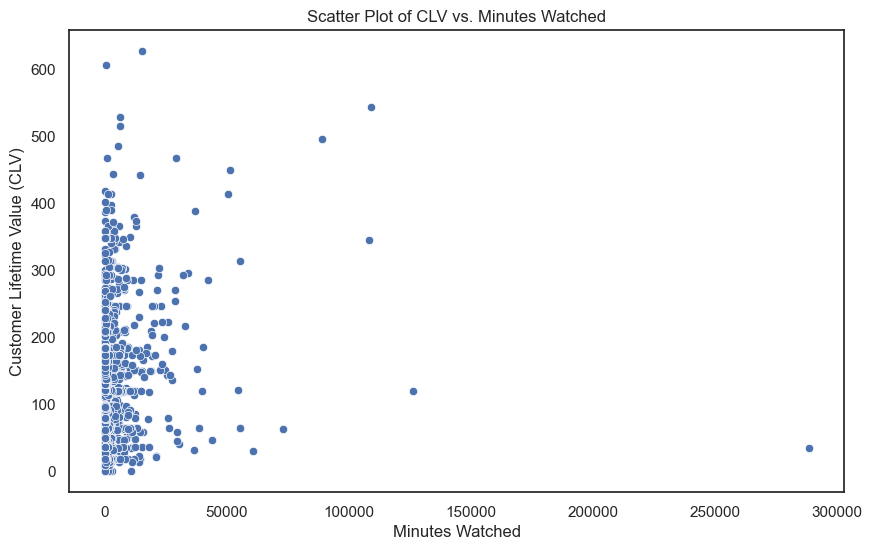

In [7]:
# Create a scatter plot for 'CLV' vs. 'minutes_watched'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_dummies, x='minutes_watched', y='CLV')
plt.title('Scatter Plot of CLV vs. Minutes Watched')
plt.xlabel('Minutes Watched')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.show()

The scatter plot reveals the spread and relationship between customer lifetime value (CLV) and minutes watched. While there's a general trend indicating that higher minutes watched could correspond to higher CLV, the relationship does not seem to be strongly linear, and there is considerable variability. This suggests that while watching more content might be associated with higher CLV, other factors not captured by this plot also play significant roles.

These analyses can help in understanding the underlying patterns and relationships within the data, which is crucial for effective customer segmentation and targeted marketing strategies.

# Model Implementation

After the exploratory part of the analysis, we have now prepared our dataset for the main part of the analysis, clustering.
Implement two clustering techniques: K-means and Hierarchical Clustering. we should specify the necessary parameters for these algorithms.

Before we begin, we must standardize the data to perform the clustering accurately. we can use the standard scaler to fit and transform the data.

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_with_dummies)

Once we’ve standardized the data, we can implement the hierarchical clustering algorithm by Ward’s method.

C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


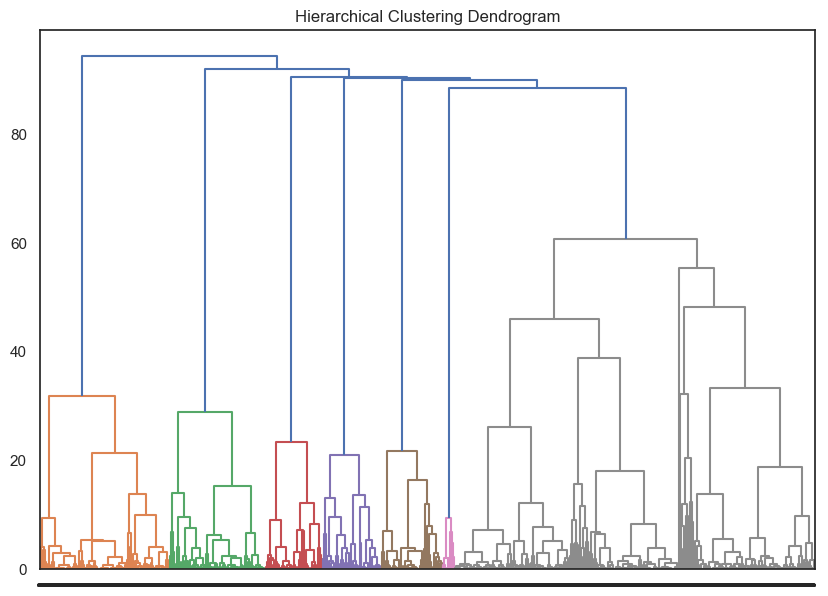

In [9]:
# Number of clusters is set to 1 for demonstration purposes;
cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data_scaled)

# Generate the linkage matrix
Z = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=cluster.labels_)
plt.show()


Next, we must perform k-means segmentation. Here, we won’t be able to predetermine the correct number of clusters, so we must explore varying clusters and use the elbow method to determine the best possible solution.

C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

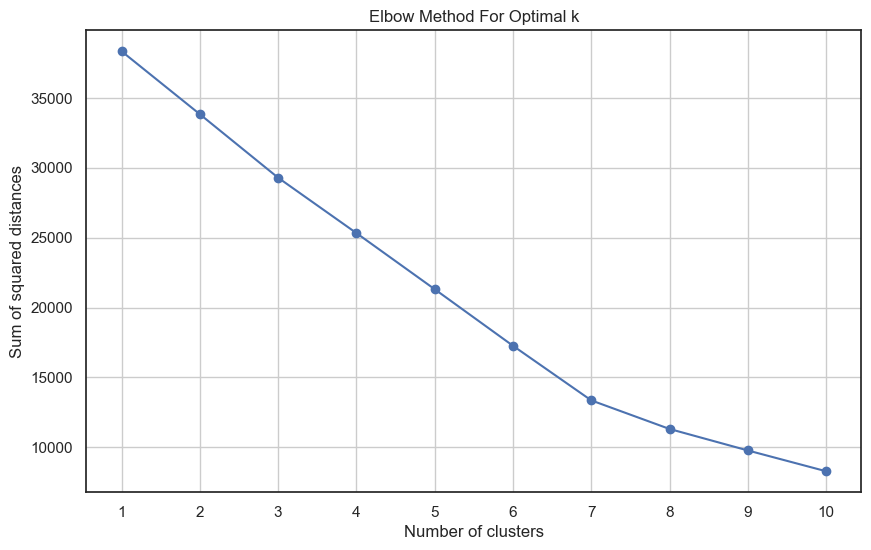

In [10]:
# Calculate sum of squared distances for different numbers of clusters
ssd = []
range_n_clusters = list(range(1, 11)) 

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


The Elbow Method graph you've provided indicates that the inertia decreases significantly as the number of clusters increases up to 4, after which the decrease in inertia becomes less pronounced. This suggests that 4 might be the optimal number of clusters for the K-means algorithm on this dataset, as the elbow of the curve seems to be at this point.

The Hierarchical Clustering Dendrogram indicates that if we cut the dendrogram at a high enough distance (y-axis represents the distance), we could argue for a varying number of clusters. A clear large division is seen at the top, which could suggest a smaller number of clusters, perhaps 2 to 4. If we cut the dendrogram at a lower distance, we would end up with more clusters. The exact number of clusters to choose can depend on the context of the data and the specific use case for the clustering.

With the elbow suggesting 4 clusters and the dendrogram also suggesting a small number of clusters, we may proceed with further analysis using 3 clusters.

# Model Evaluation and Results

In this part of the project, we will analyse the results of the segmentation we've already performed

In [11]:
# Accepting 'optimal_num_clusters' as 3
optimal_num_clusters = 3  

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)

# Fit the model on your standardized data
# Replace 'standardized_data' with your actual standardized data variable
kmeans.fit(data_scaled)

# The cluster centers
cluster_centers = kmeans.cluster_centers_

# The labels of the clusters for each data point
labels = kmeans.labels_


C:\Users\imano\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Create a summary table for each cluster and its characteristics and add several observations and the proportion of observations column for each.

In [14]:
# Create a DataFrame from the scaled data
data_scaled = pd.DataFrame(data_with_dummies, columns=data_with_dummies.columns[1:])  # exclude 'region'

# Add the cluster labels to the DataFrame
data_scaled['cluster'] = kmeans.labels_

# Calculate the mean for each cluster
cluster_summary = data_scaled.groupby('cluster').mean()

# Count the number of observations in each cluster
cluster_counts = data_scaled['cluster'].value_counts().sort_index()

# Calculate the proportion for each cluster
cluster_summary['proportion'] = cluster_counts / len(data_scaled)

# Reset the index for better readability
cluster_summary.reset_index(inplace=True)

# Display the summary table
print(cluster_summary)


   cluster         CLV    region  channel_2  channel_3  channel_4  channel_5  \
0        0  116.228397  1.183732   0.146411        0.0        0.0   0.027751   
1        1  129.046563  1.050274   0.000000        1.0        0.0   0.000000   
2        2  107.368708  1.310769   0.000000        0.0        1.0   0.000000   

   channel_6  channel_7  channel_8  proportion  
0   0.138278   0.228708   0.137799    0.545123  
1   0.000000   0.000000   0.000000    0.285342  
2   0.000000   0.000000   0.000000    0.169536  


Based on the characteristics of the clusters from the summary table and considering the context of student engagement, CLV, country region, and acquisition channel, here are the proposed segments:

Cluster 0 - "Global Passive Multi-Channel Segment":

Characteristics: This segment has a nearly average CLV and is slightly underrepresented in specific regions. The significant positive association with channel 3 and moderate associations with channels 2, 6, 7, and 8 suggest a diverse set of acquisition channels, including possibly social media, referrals, and organic search, but with a notable preference for one particular channel (potentially YouTube if that is channel 3).
Label: Given the diversity of channels and the size of the cluster, this segment may consist of globally spread students who are passively engaged through multiple channels.
Cluster 1 - "Selective High-CLV Networkers":

Characteristics: This segment shows an above-average CLV and a strong preference for channel 4, which could be a specific social network or a referral program. The positive region feature suggests these students might be from specific areas where this channel is particularly effective or popular.
Label: These could be students who are highly engaged and have a higher CLV, possibly due to strong networking effects. They could be labeled as "Selective High-CLV Networkers".
Cluster 2 - "Focused Low-CLV Channel 5 Users":

Characteristics: Students in this cluster have a lower CLV and are heavily associated with channel 5, indicating a focused and possibly exclusive engagement through this channel. The negative region feature might indicate these students are from areas less represented in other clusters.
Label: This segment could represent students who are less engaged and have a lower lifetime value, possibly using a specific acquisition channel like a particular social media platform or a targeted campaign. They could be labeled as "Focused Low-CLV Channel 5 Users".

# Conclusion

### Cluster 0 - "Global Passive Multi-Channel Segment":

Characteristics: This segment, making up over half of the customer base, has an average CLV and a broad engagement across multiple channels. It's not region-specific, indicating a global presence.

Marketing Strategy: For new customer acquisition, since this segment uses a variety of channels, maintaining a diverse channel strategy is key. However, a more targeted approach within those channels may increase efficiency. Analyzing which specific channels within this group yield the highest engagement and CLV would allow for a more focused ad spend and potentially higher returns.

Channel Performance: If any sub-channels within this group are underperforming, consider reallocating budget towards the better-performing ones or improving the content and targeting strategy for the weaker channels.

### Cluster 1 - "Selective High-CLV Networkers":

Characteristics: This segment has a higher than average CLV and is likely to be influenced by networking effects, possibly indicating a strong community or referral system.

Marketing Strategy: Given their high CLV, targeting this segment with referral programs or community-building initiatives could be very effective. Allocating more funds to the dominant channel (channel 4) for this group, particularly in regions where it performs well, could help boost acquisition.

Channel Performance: Since this channel is effective for this segment, it might be worth investing in understanding why it performs so well and replicating these features in other channels or regions.

### Cluster 2 - "Focused Low-CLV Channel 5 Users":

Characteristics: This segment has a lower CLV and is highly associated with a single channel (channel 5), which could indicate niche interests or a specific demographic.
Marketing Strategy: This segment might benefit from targeted campaigns designed to increase engagement and CLV. If channel 5 is a content-driven platform like a blog or YouTube, improving the quality of content or engagement strategies on this channel could be beneficial.
Channel Performance: If this channel is not yielding a high number of high-CLV customers, it may be wise to either tweak the approach on this channel or reduce spending in favor of channels that are proving more effective with other segments.


### General Channel Performance Analysis:

Engaged High-CLV Students: 
Determine which channels are bringing in the most engaged students with high CLV by cross-referencing the channel and region with CLV and engagement metrics.
Effective Channels by Region: For new customer acquisition, analyze the data to see if there are trends indicating that certain channels perform exceptionally well in specific regions. For example, if the data shows that a significant portion of high-CLV students in the US come from LinkedIn or Google, then increasing the marketing spend on these channels for the US market could be a strategic move.

Underperforming Channels:
Strategies for Improvement: For channels that are underperforming, consider conducting a detailed analysis to understand the reason. Is it content, targeting, or perhaps the channel's market fit? Depending on the findings, improve the content strategy or targeting precision. If the channel does not seem to fit the product, gradually reduce spending or pivot the channel's strategy to focus on brand awareness rather than direct acquisition.

Cost Reduction: 
If a channel like Instagram is not bringing in the desired number of clients or the clients have low engagement scores and CLVs, it might be necessary to reduce the cost associated with it. This could mean lowering the ad spend or reallocating the budget towards channels with a better return on investment.